## Read in Data

In [404]:
# Regression experiments for 4741

# spotify <- read.table(file="Spotify4741.10.26.csv", header=TRUE, sep=",")

# reading in the new file

spotify <- read.table(file="Spotify4741_OG.csv", header=TRUE, sep=",")

In [405]:
sum(is.na(spotify))

[1] 0

In [406]:
#Read in columns that we only care about
spotify3 <- spotify[, c("acousticness", "danceability", "energy", "liveness", "loudness", "speechiness", "tempo", "valence", "Like.or.not.like")]
#Convert -1 to 0 
spotify3$Like.or.not.like[spotify3$Like.or.not.like == -1] <- 0

In [407]:
sum(is.na(spotify3))

[1] 0

# ROC Curve Selection 

In [400]:
# Logistic Regression
spotify_logit <- glm(Like.or.not.like~., data = spotify3, family = binomial)
summary(spotify_logit)


Call:
glm(formula = Like.or.not.like ~ ., family = binomial, data = spotify3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3169  -1.0791  -0.9167   1.2616   1.7663  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)   1.896360   0.937285   2.023   0.0430 *
acousticness -0.321053   0.390073  -0.823   0.4105  
danceability  0.163968   0.612915   0.268   0.7891  
energy       -1.642466   0.761406  -2.157   0.0310 *
liveness      0.289843   0.580878   0.499   0.6178  
loudness      0.111597   0.043505   2.565   0.0103 *
speechiness   0.017238   0.866801   0.020   0.9841  
tempo        -0.000958   0.002753  -0.348   0.7279  
valence      -0.744456   0.444260  -1.676   0.0938 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 972.83  on 709  degrees of freedom
Residual deviance: 960.10  on 701  degrees of freedom
AIC: 978.1

Number of Fisher

## ROC Curve selection for Logistic Regression

In [334]:
# Redo the fitting again
#Set up lower bound and uper bound for threshold 
lb <- 0; ub <- 1

#Establish weighted average ratios
tpr_w <- .5; recommend_w <- .5;

#Define variables
tpr <- rep(0, (ub-lb)/0.01 + 1)
fpr <- rep(0, (ub-lb)/0.01 + 1)
counter <- 1
accuracy <- 0
index <- 1
index_1 <- -1; index_2 <- -1; index_3 <- -1;
train_ind <- sample(1:nrow(spotify3), 2/3*nrow(spotify3))
spotify3_train <- spotify3[train_ind, ]
spotify3_test <- spotify3[-train_ind, ]

#Training fit of function 
spotify3_logit <- glm(Like.or.not.like~., data = spotify3_train, family = binomial)
#Testing fit for TESTING
spotify3_pred <- predict(spotify3_logit, spotify3_test, type = "response")

#For loop for varying thresholds
for (threshold in seq(0,1,.01)) {

    #Fit Logistic Regression for different threshold
    spotify_bin <- as.numeric(spotify3_pred >= threshold)
    table(spotify_bin, spotify3_test$Like.or.not.like)
    y=table(spotify_bin, spotify3_test$Like.or.not.like)
    
    #Check that table is 2x2 then only do the following
    if (dim(y)[1] == 2 && dim(y)[2] == 2 && (y[1,1]!=0 && y[1,2]!=0 && y[2,1]!=0 && y[2,2]!=0)) {

        #track the TPR and FPR for different thresholds
        tpr[counter] <- y[2,2]/(sum(y[,2])) 
        fpr[counter] <- y[2,1]/(sum(y[,1]))
    
        #Calculate best combination of weighted average accuracy
        #Go through each TPR weightage
        for (j in seq(tpr_w, 1.0, 0.01)) {
            #Go through each recommended weightage
            for (k in seq(recommend_w, 1.0, 0.01)) {
                    if (((tpr_w*tpr[counter] + recommend_w*y[2,2]/sum(y[2,])) > accuracy) && (tpr[counter] > j) && ((y[2,2]/sum(y[2,])) > k ) ) {
                        accuracy <- (tpr_w*tpr[counter] + recommend_w*y[2,2]/sum(y[2,]))
                        index_1 <- counter
                        index_2 <- j
                        index_3 <- k
                        selected_table=table(spotify_bin, spotify3_test$Like.or.not.like)
                }
            }
        }
    }                  
    counter <- counter+1
}

In [341]:
#fpr[length(fpr)] <- NULL


[1] 0.905660377 0.905660377 0.896226415 0.886792453 0.886792453 0.877358491
 [7] 0.839622642 0.839622642 0.820754717 0.783018868 0.773584906 0.754716981
[13] 0.735849057 0.726415094 0.716981132 0.688679245 0.679245283 0.641509434
[19] 0.632075472 0.594339623 0.556603774 0.537735849 0.509433962 0.509433962
[25] 0.509433962 0.509433962 0.509433962 0.500000000 0.462264151 0.443396226
[31] 0.424528302 0.415094340 0.396226415 0.367924528 0.367924528 0.339622642
[37] 0.311320755 0.301886792 0.273584906 0.235849057 0.235849057 0.207547170
[43] 0.188679245 0.179245283 0.160377358 0.150943396 0.132075472 0.103773585
[49] 0.084905660 0.084905660 0.066037736 0.056603774 0.037735849 0.037735849
[55] 0.028301887 0.028301887 0.028301887 0.028301887 0.028301887 0.018867925
[61] 0.009433962 0.009433962 0.009433962 0.009433962 0.009433962 0.009433962

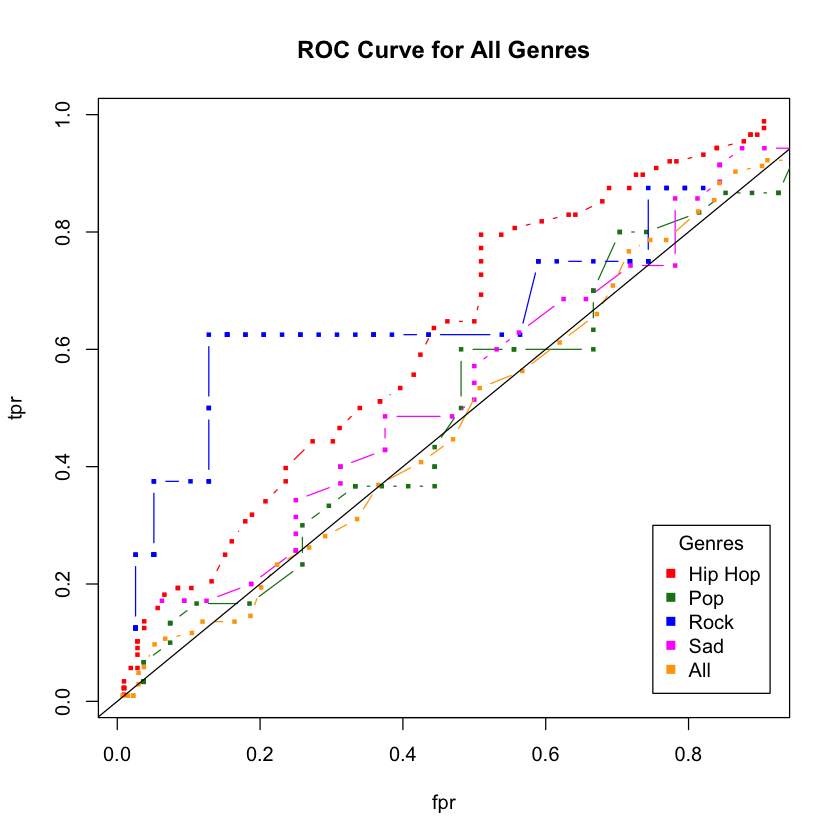

In [417]:
# Drop all 0s
fpr = fpr[fpr > 0]; tpr = tpr[tpr>0];
fpr_pop = fpr_pop[fpr_pop > 0]; tpr_pop = tpr_pop[tpr_pop>0];
fpr_r = fpr_r[fpr_r > 0]; tpr_r = tpr_r[tpr_r>0];
fpr_s = fpr_s[fpr_s > 0]; tpr_s = tpr_s[tpr_s>0];
fpr_a = fpr_a[fpr_a > 0]; tpr_a = tpr_a[tpr_a>0];

#Plot all ROC curves for each genre
plot(fpr,tpr, col=rgb(1,0,0),pch=15,type="b", cex=0.5) #hip hop
points(fpr_pop,tpr_pop, col=rgb(.1,.5,.1),pch=15,type="b",cex=0.5) #pop
points(fpr_r,tpr_r,col=rgb(0,0,1),pch=15,type="b",cex=0.5) #rock
points(fpr_s,tpr_s,col=rgb(1,0,1),pch=15,type="b",cex=0.5) #mellow
points(fpr_a,tpr_a,col=rgb(1,165/255,0),pch=15,type="b",cex=0.5) #all
legend(.75,.3,legend=c("Hip Hop","Pop","Rock","Sad","All"),col=c(rgb(1,0,0),rgb(.1,.5,.1),rgb(0,0,1),rgb(1,0,1),rgb(1,165/255,0)),pch=15,title="Genres")
#draw y=x line 
abline(a=0,b=1)
title("ROC Curve for All Genres")

In [217]:
help(package=colorspace)

### Pop ROC Curve

In [394]:
# Redo the fitting again
#Set up lower bound and uper bound for threshold 
lb <- 0; ub <- 1

#Establish weighted average ratios
tpr_w <- .5; recommend_w <- .5;

#Define variables
tpr_pop <- rep(0, (ub-lb)/0.01 + 1)
fpr_pop <- rep(0, (ub-lb)/0.01 + 1)
counter <- 1
accuracy <- 0
index <- 1
index_1 <- -1; index_2 <- -1; index_3 <- -1;
train_ind <- sample(1:nrow(spotify3), 2/3*nrow(spotify3))
spotify3_train <- spotify3[train_ind, ]
spotify3_test <- spotify3[-train_ind, ]

#Training fit of function 
spotify3_logit <- glm(Like.or.not.like~., data = spotify3_train, family = binomial)
#Testing fit for TESTING
spotify3_pred <- predict(spotify3_logit, spotify3_test, type = "response")

#For loop for varying thresholds
for (threshold in seq(0,1,.01)) {

    #Fit Logistic Regression for different threshold
    spotify_bin <- as.numeric(spotify3_pred >= threshold)
    table(spotify_bin, spotify3_test$Like.or.not.like)
    y=table(spotify_bin, spotify3_test$Like.or.not.like)
    
    #Check that table is 2x2 then only do the following
    if (dim(y)[1] == 2 && dim(y)[2] == 2 && (y[1,1]!=0 && y[1,2]!=0 && y[2,1]!=0 && y[2,2]!=0)) {

        #track the TPR and FPR for different thresholds
        tpr_pop[counter] <- y[2,2]/(sum(y[,2])) 
        fpr_pop[counter] <- y[2,1]/(sum(y[,1]))
    
        #Calculate best combination of weighted average accuracy
        #Go through each TPR weightage
        for (j in seq(tpr_w, 1.0, 0.01)) {
            #Go through each recommended weightage
            for (k in seq(recommend_w, 1.0, 0.01)) {
                    if (((tpr_w*tpr_pop[counter] + recommend_w*y[2,2]/sum(y[2,])) > accuracy) && (tpr_pop[counter] > j) && ((y[2,2]/sum(y[2,])) > k ) ) {
                        accuracy <- (tpr_w*tpr_pop[counter] + recommend_w*y[2,2]/sum(y[2,]))
                        index_1 <- counter
                        index_2 <- j
                        index_3 <- k
                        selected_table=table(spotify_bin, spotify3_test$Like.or.not.like)
                }
            }
        }
    }                  
    counter <- counter+1
}

### Rock ROC Curve

In [378]:
# Redo the fitting again
#Set up lower bound and uper bound for threshold 
lb <- 0; ub <- 1

#Establish weighted average ratios
tpr_w <- .5; recommend_w <- .5;

#Define variables
tpr_r <- rep(0, (ub-lb)/0.01 + 1)
fpr_r <- rep(0, (ub-lb)/0.01 + 1)
counter <- 1
accuracy <- 0
index <- 1
index_1 <- -1; index_2 <- -1; index_3 <- -1;
train_ind <- sample(1:nrow(spotify3), 2/3*nrow(spotify3))
spotify3_train <- spotify3[train_ind, ]
spotify3_test <- spotify3[-train_ind, ]

#Training fit of function 
spotify3_logit <- glm(Like.or.not.like~., data = spotify3_train, family = binomial)
#Testing fit for TESTING
spotify3_pred <- predict(spotify3_logit, spotify3_test, type = "response")

#For loop for varying thresholds
for (threshold in seq(0,1,.01)) {

    #Fit Logistic Regression for different threshold
    spotify_bin <- as.numeric(spotify3_pred >= threshold)
    table(spotify_bin, spotify3_test$Like.or.not.like)
    y=table(spotify_bin, spotify3_test$Like.or.not.like)
    
    #Check that table is 2x2 then only do the following
    if (dim(y)[1] == 2 && dim(y)[2] == 2 && (y[1,1]!=0 && y[1,2]!=0 && y[2,1]!=0 && y[2,2]!=0)) {

        #track the TPR and FPR for different thresholds
        tpr_r[counter] <- y[2,2]/(sum(y[,2])) 
        fpr_r[counter] <- y[2,1]/(sum(y[,1]))
    
        #Calculate best combination of weighted average accuracy
        #Go through each TPR weightage
        for (j in seq(tpr_w, 1.0, 0.01)) {
            #Go through each recommended weightage
            for (k in seq(recommend_w, 1.0, 0.01)) {
                    if (((tpr_w*tpr_r[counter] + recommend_w*y[2,2]/sum(y[2,])) > accuracy) && (tpr_r[counter] > j) && ((y[2,2]/sum(y[2,])) > k ) ) {
                        accuracy <- (tpr_w*tpr_r[counter] + recommend_w*y[2,2]/sum(y[2,]))
                        index_1 <- counter
                        index_2 <- j
                        index_3 <- k
                        selected_table=table(spotify_bin, spotify3_test$Like.or.not.like)
                }
            }
        }
    }                  
    counter <- counter+1
}

### Mellow Songs

In [385]:
# Redo the fitting again
#Set up lower bound and uper bound for threshold 
lb <- 0; ub <- 1

#Establish weighted average ratios
tpr_w <- .5; recommend_w <- .5;

#Define variables
tpr_s <- rep(0, (ub-lb)/0.01 + 1)
fpr_s <- rep(0, (ub-lb)/0.01 + 1)
counter <- 1
accuracy <- 0
index <- 1
index_1 <- -1; index_2 <- -1; index_3 <- -1;
train_ind <- sample(1:nrow(spotify3), 2/3*nrow(spotify3))
spotify3_train <- spotify3[train_ind, ]
spotify3_test <- spotify3[-train_ind, ]

#Training fit of function 
spotify3_logit <- glm(Like.or.not.like~., data = spotify3_train, family = binomial)
#Testing fit for TESTING
spotify3_pred <- predict(spotify3_logit, spotify3_test, type = "response")

#For loop for varying thresholds
for (threshold in seq(0,1,.01)) {

    #Fit Logistic Regression for different threshold
    spotify_bin <- as.numeric(spotify3_pred >= threshold)
    table(spotify_bin, spotify3_test$Like.or.not.like)
    y=table(spotify_bin, spotify3_test$Like.or.not.like)
    
    #Check that table is 2x2 then only do the following
    if (dim(y)[1] == 2 && dim(y)[2] == 2 && (y[1,1]!=0 && y[1,2]!=0 && y[2,1]!=0 && y[2,2]!=0)) {

        #track the TPR and FPR for different thresholds
        tpr_s[counter] <- y[2,2]/(sum(y[,2])) 
        fpr_s[counter] <- y[2,1]/(sum(y[,1]))
    
        #Calculate best combination of weighted average accuracy
        #Go through each TPR weightage
        for (j in seq(tpr_w, 1.0, 0.01)) {
            #Go through each recommended weightage
            for (k in seq(recommend_w, 1.0, 0.01)) {
                    if (((tpr_w*tpr_s[counter] + recommend_w*y[2,2]/sum(y[2,])) > accuracy) && (tpr_s[counter] > j) && ((y[2,2]/sum(y[2,])) > k ) ) {
                        accuracy <- (tpr_w*tpr_s[counter] + recommend_w*y[2,2]/sum(y[2,]))
                        index_1 <- counter
                        index_2 <- j
                        index_3 <- k
                        selected_table=table(spotify_bin, spotify3_test$Like.or.not.like)
                }
            }
        }
    }                  
    counter <- counter+1
}

### All Genres

In [408]:
# Redo the fitting again
#Set up lower bound and uper bound for threshold 
lb <- 0; ub <- 1

#Establish weighted average ratios
tpr_w <- .5; recommend_w <- .5;

#Define variables
tpr_a <- rep(0, (ub-lb)/0.01 + 1)
fpr_a <- rep(0, (ub-lb)/0.01 + 1)
counter <- 1
accuracy <- 0
index <- 1
index_1 <- -1; index_2 <- -1; index_3 <- -1;
train_ind <- sample(1:nrow(spotify3), 2/3*nrow(spotify3))
spotify3_train <- spotify3[train_ind, ]
spotify3_test <- spotify3[-train_ind, ]

#Training fit of function 
spotify3_logit <- glm(Like.or.not.like~., data = spotify3_train, family = binomial)
#Testing fit for TESTING
spotify3_pred <- predict(spotify3_logit, spotify3_test, type = "response")

#For loop for varying thresholds
for (threshold in seq(0,1,.01)) {

    #Fit Logistic Regression for different threshold
    spotify_bin <- as.numeric(spotify3_pred >= threshold)
    table(spotify_bin, spotify3_test$Like.or.not.like)
    y=table(spotify_bin, spotify3_test$Like.or.not.like)
    
    #Check that table is 2x2 then only do the following
    if (dim(y)[1] == 2 && dim(y)[2] == 2 && (y[1,1]!=0 && y[1,2]!=0 && y[2,1]!=0 && y[2,2]!=0)) {

        #track the TPR and FPR for different thresholds
        tpr_a[counter] <- y[2,2]/(sum(y[,2])) 
        fpr_a[counter] <- y[2,1]/(sum(y[,1]))
    
        #Calculate best combination of weighted average accuracy
        #Go through each TPR weightage
        for (j in seq(tpr_w, 1.0, 0.01)) {
            #Go through each recommended weightage
            for (k in seq(recommend_w, 1.0, 0.01)) {
                    if (((tpr_w*tpr_a[counter] + recommend_w*y[2,2]/sum(y[2,])) > accuracy) && (tpr_a[counter] > j) && ((y[2,2]/sum(y[2,])) > k ) ) {
                        accuracy <- (tpr_w*tpr_a[counter] + recommend_w*y[2,2]/sum(y[2,]))
                        index_1 <- counter
                        index_2 <- j
                        index_3 <- k
                        selected_table=table(spotify_bin, spotify3_test$Like.or.not.like)
                }
            }
        }
    }                  
    counter <- counter+1
}